# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [4]:
!pip install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image geopy

## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

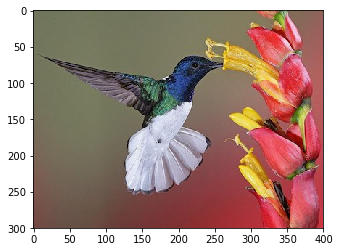

In [5]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread("bird.jpg")
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [6]:
from skimage import img_as_float
img_float = img_as_float(img)
img_float

array([[[ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118]],

       [[ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118]],

       [[ 0.43921569,  0.4627451 ,  0.36078431],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56470588,  0.38039216,  0.34901961],
        [ 0.56470588,  0.38039216,  0.34901961]],

       ..., 
       [[ 0.45098039,  0.2745098 ,  0.25490196],
        

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [7]:
img_float = np.ravel(img_float)
img_float = np.vstack((img_float[::3], img_float[1::3], img_float[2::3]))
img_float = img_float.transpose()
img_float.shape

(120000, 3)

### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [8]:
from sklearn.cluster import KMeans
centers_number = 8
clf = KMeans(n_clusters=centers_number)
%time
result = clf.fit(img_float)

Wall time: 0 ns


### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

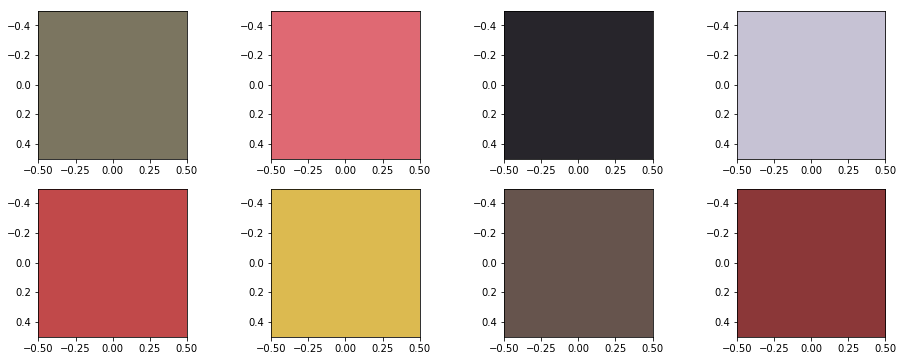

In [9]:
plt.figure(figsize=(16, 6))

for i, center in enumerate(clf.cluster_centers_):
    plt.subplot(2, 4, i + 1)
    plt.imshow(center[:].reshape([1, 1, 3]))

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

In [10]:
img = clf.predict(img_float).reshape(300, 400)
result = np.empty((300, 400, 3))
labels = clf.labels_
centers = clf.cluster_centers_
for label in labels:
    result[img == label] = centers[label]

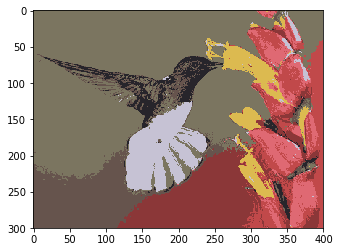

In [11]:
plt.imshow(result)

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 жлементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [12]:
import pandas as pd
df = pd.read_csv('data/checkins.csv.gz', compression='gzip')
print(df.shape)
df.head()

(100000, 2)


,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [13]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [14]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift(bandwidth=0.1)
mean_shift.fit(df)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [15]:
print(mean_shift.cluster_centers_)
mean_shift.cluster_centers_.shape

[[  40.7177164   -73.99183542]
 [  33.44943805 -112.00213969]
 [  33.44638027 -111.90188756]
 ..., 
 [  38.891565   -121.2930079 ]
 [  42.5953378   -78.9411461 ]
 [  41.5822716   -85.8344383 ]]


(3230, 2)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

Wall time: 0 ns


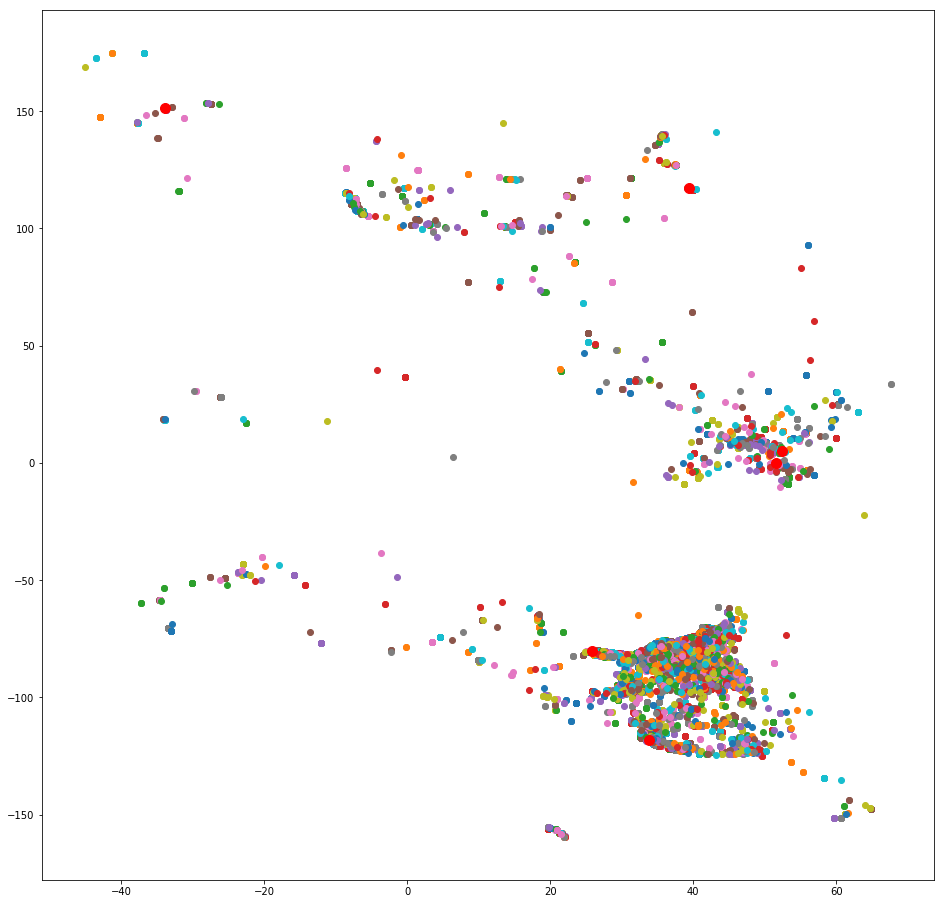

In [19]:
plt.figure(figsize=(16, 16))

labels = pd.Series(data = mean_shift.labels_, index = df.index)
data = df.copy()

for label in np.unique(labels):
    cluster_data = data[labels == label]
    data = data.drop(cluster_data.index, axis=0)
    labels = labels.drop(cluster_data.index)
    plt.scatter(cluster_data["latitude"], cluster_data["longitude"])

offices = np.array([[33.751277, -118.188740],
                    [25.867736, -80.324116],
                    [51.503016, -0.075479],
                    [52.378894, 4.885084],
                    [39.366487, 117.036146],
                    [-33.868457, 151.205134 ]])
for office in offices:
    plt.scatter(office[0], office[1], s=100, c='r')

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [17]:
labels = mean_shift.labels_
labels_unique = np.unique(mean_shift.labels_)

for label in labels_unique:
    if((labels == label).sum() < 15):
        labels = labels[labels != label]
        
labels_unique = np.unique(labels)
labels_unique.shape

(624,)

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [18]:
from geopy.distance import vincenty

offices = np.array([[33.751277, -118.188740],
                    [25.867736, -80.324116],
                    [51.503016, -0.075479],
                    [52.378894, 4.885084],
                    [39.366487, 117.036146],
                    [-33.868457, 151.205134 ]])

cluster_centers = mean_shift.cluster_centers_


result = pd.DataFrame(columns=["cluster_number", "distance", "coord_1", "coord_2"], dtype='float')
for e, office in enumerate(offices):
    for i, cluster_center in enumerate(cluster_centers):
        distance = vincenty(office, cluster_center).miles
        result.loc[len(result)] = [i, distance, cluster_center[0], cluster_center[1]]
            
        
result = result.sort_values("distance")[:20]
result

,cluster_number,distance,coord_1,coord_2
10063,373.0,0.511664,52.372964,4.892317
16556,406.0,0.539819,-33.860630,151.204776
3645,415.0,1.553328,25.845672,-80.318891
6518,58.0,2.159791,51.502991,-0.125537
51,51.0,4.643652,33.809878,-118.148924
3259,29.0,8.692678,25.785812,-80.217938
18121,1971.0,10.207814,-34.001906,151.128069
10765,1075.0,10.653689,52.388501,4.633765
7327,867.0,11.177448,51.426763,-0.303732
3396,166.0,11.462413,25.705350,-80.283429


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 